In [1]:
import os
import sys
import math
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo
import torchvision.models as models

from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from pathlib import Path
import numpy as np
from tqdm import tqdm
from utilsFn import *

import BaseModel as B
import CDDSM
import time
import logging
import copy
import argparse
import numpy
import progressbar as pb

checkpoint = torch.load('./models/21Nov20181234/model_E100B10Im512lr0.005.ckpt')

model = B.getModel(3)
batch_size = 1
learning_rate = 0.01

model.load_state_dict(checkpoint)
#Image size
img_resize=H=W=512

test_file='test.csv'
homedir  = str(Path.home())


In [2]:

test_dataset = CDDSM.MammographyDataset(test_file,homedir,img_resize)


test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=1, 
                                          shuffle=False)


number_of_testing_data = test_dataset.__len__()


total_step = len(test_loader)
print(number_of_testing_data)
widgets = ['Progress for train data cleaning: ', pb.Percentage(), ' ', 
            pb.Bar(marker=pb.RotatingMarker()), ' ', pb.ETA()]


704


# View Images

In [3]:
def imshow(img,title='None'):
#     img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
#     npimg = npimg.squeeze(2)
    plt.title(title)
    plt.imshow(np.transpose(npimg, (1, 2, 0)).squeeze(2),cmap='gray')

2


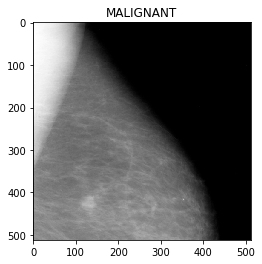

In [33]:
img,label,labelstr = test_dataset[27]
imshow(img,labelstr)
print(label)

In [5]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(pytorch_total_params)

2620995


In [6]:
true = []
predicted = []
prob = []
model = model.eval()
timer = pb.ProgressBar(widgets=widgets, maxval=total_step+1).start()
with torch.no_grad():
    for i,(img,label,path) in enumerate(test_loader):
        timer.update(i)
        
        out = F.softmax(model(img),dim=1)
        pred = out.squeeze(0).numpy()
        predlabel = numpy.argmax(pred)
#         print(predlabel)
#         print(out.squeeze(0).numpy())
#         print(label.numpy().item())
        true.append(label.numpy().item())
        predicted.append(predlabel)
        prob.append(pred)
timer.finish()

Progress for train data cleaning: 100% |||||||||||||||||||||||||| Time: 0:22:13


In [7]:
probN = np.asarray(prob)

In [11]:
probN

array([[0.47232324, 0.19024733, 0.33742937],
       [0.47232324, 0.19024733, 0.33742937],
       [0.47232324, 0.19024733, 0.33742937],
       ...,
       [0.47232324, 0.19024733, 0.33742937],
       [0.47232324, 0.19024733, 0.33742937],
       [0.47232324, 0.19024733, 0.33742937]], dtype=float32)

In [25]:
correctindex=[]
wrongindex =[]
for i in range(len(true)):
    
    if(true[i]==predicted[i]):
        correctindex.append(i)
    else:
        wrongindex.append(i)
    


In [31]:
wrongindex

[0,
 1,
 2,
 3,
 6,
 7,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 26,
 27,
 29,
 30,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 54,
 55,
 56,
 63,
 64,
 65,
 66,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 81,
 82,
 93,
 98,
 99,
 108,
 109,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 135,
 136,
 137,
 140,
 147,
 148,
 150,
 151,
 153,
 158,
 159,
 167,
 168,
 169,
 170,
 173,
 174,
 176,
 177,
 178,
 183,
 184,
 187,
 188,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 206,
 208,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 247,
 248,
 249,
 250,
 251,
 252,
 259,
 260,
 261,
 262,
 263,
 264,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 285,
 286,
 291,
 293,
 302,
 303,
 306,
 307,
 310,
 311,
 326,
 327,
 328,
 330,
 332,
 333,
 334,
 335,
 336,
 337,
 349,
 350,
 353,
 354,
 357,
 358,
 359,
 366,
 367,


704

/home/himanshu/py3Env/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


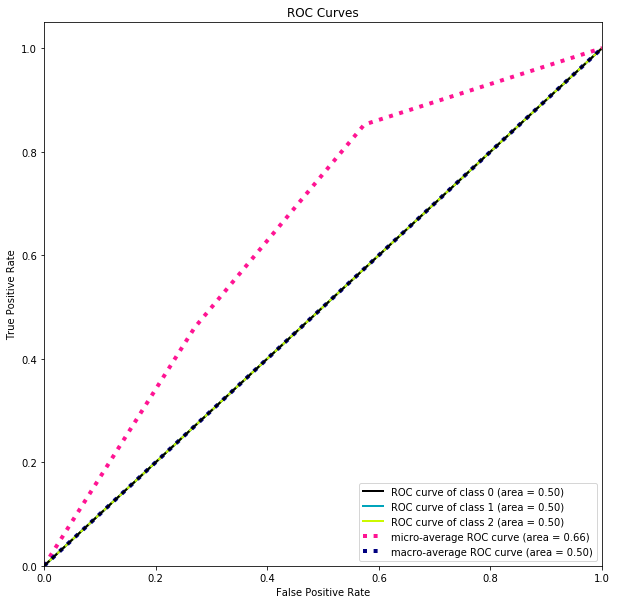

In [35]:
import scikitplot as skplt
import matplotlib.pyplot as plt

# y_true = # ground truth labels
# y_probas = # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(true, probN)
plt.rcParams['figure.figsize']=[10,10]
plt.show()